# Forecasting Solar Energy Production with Weather data

#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Loading datasets into pandas

In [2]:
data2017 = pd.read_csv('2017_Data.csv')
data2018 = pd.read_csv('2018_Data.csv')
data2019 = pd.read_csv('2019_Data.csv')

#### Exploring Insights on Data

In [3]:
data2017.head(3)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2017,1,1,0,0,0,0,8,2,166.36,0,0.157,1.1,1.430,42.8,100.0,4,930
1,2017,1,1,0,30,0,0,8,2,163.49,0,0.157,1.1,1.416,42.8,100.0,4,930
2,2017,1,1,1,0,0,0,3,2,158.95,0,0.157,1.1,1.403,35.1,100.0,4,930


In [4]:
data2017.shape

(17520, 18)

In [5]:
data2018.head(3)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2018,1,1,0,0,0,0,0,-10.1,166.39,0,0.17,1.5,0.6,4,26.75,7.9,948
1,2018,1,1,0,30,0,0,0,-10.1,163.50,0,0.17,1.5,0.6,181,27.68,7.4,948
2,2018,1,1,1,0,0,0,0,-9.5,158.96,0,0.17,1.6,0.6,357,30.04,6.9,948


In [6]:
data2018.shape

(17520, 18)

In [7]:
data2019.head(3)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2019,1,1,0,0,0,0,0,-12.6,166.40,0,0.17,3.2,0.4,358,40.83,-0.9,943
1,2019,1,1,0,30,0,0,0,-12.6,163.50,0,0.17,3.2,0.4,357,41.13,-1.0,943
2,2019,1,1,1,0,0,0,0,-12.6,158.95,0,0.17,3.2,0.4,356,41.79,-1.2,943


In [8]:
data2017.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [9]:
data2018.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [10]:
data2019.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [11]:
datasets = [data2017,data2018,data2019]
df = pd.concat(datasets)

In [12]:
df['Year'].unique()

array([2017, 2018, 2019], dtype=int64)

In [13]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'Solar Zenith Angle', 'Fill Flag',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure'],
      dtype='object')

In [14]:
df.describe()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.00000,52560.000000
mean,2018.000000,6.526027,15.720548,11.500000,15.000000,233.314669,256.760331,2.096766,-0.440409,89.689162,0.227340,0.179440,2.588415,1.386231,183.342154,32.234062,20.46121,940.898973
std,0.816504,3.447884,8.796331,6.922252,15.000143,317.244451,331.939308,2.975211,7.479977,38.039271,0.850164,0.022069,1.807017,0.893441,106.711185,20.801842,10.86176,5.191706
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.100000,12.990000,0.000000,0.157000,0.000000,0.100000,0.000000,3.160000,-2.60000,920.000000
25%,2017.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,-5.100000,59.160000,0.000000,0.180000,1.300000,0.800000,96.000000,16.130000,11.70000,939.000000
50%,2018.000000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,-0.400000,89.560000,0.000000,0.180000,2.000000,1.158000,205.000000,27.060000,19.80000,940.000000
75%,2019.000000,10.000000,23.000000,17.250000,30.000000,456.000000,525.000000,4.000000,4.200000,120.380000,0.000000,0.181000,3.500000,1.700000,245.000000,43.500000,28.90000,944.000000
max,2019.000000,12.000000,31.000000,23.000000,30.000000,1067.000000,1067.000000,9.000000,23.000000,167.150000,5.000000,0.870000,13.400000,6.600000,360.000000,100.000000,47.00000,960.000000


In [15]:
df.shape

(52560, 18)

In [16]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
0,2017,1,1,0,0,0,0,8,2.0,166.36,0,0.157,1.1,1.430,42.8,100.0,4.0,930
1,2017,1,1,0,30,0,0,8,2.0,163.49,0,0.157,1.1,1.416,42.8,100.0,4.0,930
2,2017,1,1,1,0,0,0,3,2.0,158.95,0,0.157,1.1,1.403,35.1,100.0,4.0,930
3,2017,1,1,1,30,0,0,1,2.0,153.60,0,0.157,1.1,1.390,35.1,100.0,4.0,930
4,2017,1,1,2,0,0,0,0,2.0,147.87,0,0.157,1.1,1.378,22.3,100.0,4.0,930


#### Creating Time-series feature

In [17]:
datetime_series = pd.Series(pd.date_range(start = '2017-01-01',periods = 52560,freq = '30min'),name = 'DateSeries')

In [18]:
datetime_series

0       2017-01-01 00:00:00
1       2017-01-01 00:30:00
2       2017-01-01 01:00:00
3       2017-01-01 01:30:00
4       2017-01-01 02:00:00
                ...        
52555   2019-12-31 21:30:00
52556   2019-12-31 22:00:00
52557   2019-12-31 22:30:00
52558   2019-12-31 23:00:00
52559   2019-12-31 23:30:00
Name: DateSeries, Length: 52560, dtype: datetime64[ns]

In [19]:
df = df.set_index(datetime_series)

In [20]:
df.loc['2017-01-01 00:00:00':'2017-01-01 01:30:00']

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
DateSeries,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,1,0,0,0,0,8,2.0,166.36,0,0.157,1.1,1.430,42.8,100.0,4.0,930
2017-01-01 00:30:00,2017,1,1,0,30,0,0,8,2.0,163.49,0,0.157,1.1,1.416,42.8,100.0,4.0,930
2017-01-01 01:00:00,2017,1,1,1,0,0,0,3,2.0,158.95,0,0.157,1.1,1.403,35.1,100.0,4.0,930
2017-01-01 01:30:00,2017,1,1,1,30,0,0,1,2.0,153.60,0,0.157,1.1,1.390,35.1,100.0,4.0,930


In [21]:
df.head(1)

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
DateSeries,,,,,,,,,,,,,,,,,,
2017-01-01,2017,1,1,0,0,0,0,8,2.0,166.36,0,0.157,1.1,1.43,42.8,100.0,4.0,930


#### Dropping irrelavant features from the dataframe

In [22]:
new_df = df.drop(columns = ['Clearsky GHI','Fill Flag'])

In [23]:
new_df.head(3)

,Year,Month,Day,Hour,Minute,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
DateSeries,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,1,0,0,0,8,2.0,166.36,0.157,1.1,1.430,42.8,100.0,4.0,930
2017-01-01 00:30:00,2017,1,1,0,30,0,8,2.0,163.49,0.157,1.1,1.416,42.8,100.0,4.0,930
2017-01-01 01:00:00,2017,1,1,1,0,0,3,2.0,158.95,0.157,1.1,1.403,35.1,100.0,4.0,930


#### Features we need in model:
       Year Day Hour-Minute Surface Albedo Cloud Type Dew Point Zenith Angle,Month Pressure Wind Direction Wind Speed 
       Relative Humidity Temperature Precipitable Water

In [24]:
#reordering the index of columns in the dataframe
column_names = ['Year','Day','Hour','Minute','Surface Albedo','Cloud Type','Dew Point','Solar Zenith Angle','Month','Pressure','Wind Direction','Wind Speed','Relative Humidity','Temperature','Precipitable Water','GHI']
new_df = new_df.reindex(columns=column_names)

In [25]:
new_df.head(3)

,Year,Day,Hour,Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
DateSeries,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,0,0,0.157,8,2.0,166.36,1,930,42.8,1.1,100.0,4.0,1.430,0
2017-01-01 00:30:00,2017,1,0,30,0.157,8,2.0,163.49,1,930,42.8,1.1,100.0,4.0,1.416,0
2017-01-01 01:00:00,2017,1,1,0,0.157,3,2.0,158.95,1,930,35.1,1.1,100.0,4.0,1.403,0


In [26]:
# new_df.to_csv('cleaned_weather_data.csv')

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2017-01-01 00:00:00 to 2019-12-31 23:30:00
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52560 non-null  int64  
 1   Day                 52560 non-null  int64  
 2   Hour                52560 non-null  int64  
 3   Minute              52560 non-null  int64  
 4   Surface Albedo      52560 non-null  float64
 5   Cloud Type          52560 non-null  int64  
 6   Dew Point           52560 non-null  float64
 7   Solar Zenith Angle  52560 non-null  float64
 8   Month               52560 non-null  int64  
 9   Pressure            52560 non-null  int64  
 10  Wind Direction      52560 non-null  float64
 11  Wind Speed          52560 non-null  float64
 12  Relative Humidity   52560 non-null  float64
 13  Temperature         52560 non-null  float64
 14  Precipitable Water  52560 non-null  float64
 15  GHI               

In [28]:
new_df.isna().sum()

Year                  0
Day                   0
Hour                  0
Minute                0
Surface Albedo        0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Month                 0
Pressure              0
Wind Direction        0
Wind Speed            0
Relative Humidity     0
Temperature           0
Precipitable Water    0
GHI                   0
dtype: int64

In [29]:
new_df.head(3)

,Year,Day,Hour,Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
DateSeries,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017,1,0,0,0.157,8,2.0,166.36,1,930,42.8,1.1,100.0,4.0,1.430,0
2017-01-01 00:30:00,2017,1,0,30,0.157,8,2.0,163.49,1,930,42.8,1.1,100.0,4.0,1.416,0
2017-01-01 01:00:00,2017,1,1,0,0.157,3,2.0,158.95,1,930,35.1,1.1,100.0,4.0,1.403,0


In [30]:
# new_df.to_csv('weather.csv')

#### Loading cleaned & processed data

In [31]:
df = pd.read_csv('weather.csv')
df.head(3)

,DateSeries,Year,Day,Hour,Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
0,2017-01-01 00:00:00,2017,1,0,0,0.157,8,2.0,166.36,1,930,42.8,1.1,100.0,4.0,1.430,0
1,2017-01-01 00:30:00,2017,1,0,30,0.157,8,2.0,163.49,1,930,42.8,1.1,100.0,4.0,1.416,0
2,2017-01-01 01:00:00,2017,1,1,0,0.157,3,2.0,158.95,1,930,35.1,1.1,100.0,4.0,1.403,0


In [32]:
df1 = df.drop(columns = ['DateSeries'])

#### Handling Outliers from temperature feature

In [33]:
df1['Temperature'] = df['Temperature'].apply(lambda x : 0 if x < 0 else x)

In [34]:
x1 = df1[['Year', 'Day', 'Hour', 'Minute', 'Surface Albedo', 'Cloud Type', 'Solar Zenith Angle', 'Month', 'Pressure','Wind Direction', 'Wind Speed', 'Relative Humidity','Precipitable Water','Temperature']]
y1 = df1[['GHI']]

### Feature Engineering

#### We will select the 10 best features for our model

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [36]:
bestfeatures = SelectKBest(score_func = chi2,k =10 )
fit = bestfeatures.fit(x1,y1)

In [37]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

In [38]:
featuresScores = pd.concat([dfcolumns,dfscores],axis = 1)
featuresScores.columns = ['Specs','Score']

In [39]:
featuresScores.nlargest(10,'Score')

,Specs,Score
6,Solar Zenith Angle,715657.355338
9,Wind Direction,314668.407817
11,Relative Humidity,170287.409795
13,Temperature,98667.790698
5,Cloud Type,20221.014428
3,Minute,18368.972811
10,Wind Speed,12665.963828
1,Day,5816.852021
7,Month,1876.432293
12,Precipitable Water,1181.380533


<AxesSubplot:title={'center':'How much each feature has an impact on target variable'}, ylabel='Specs'>

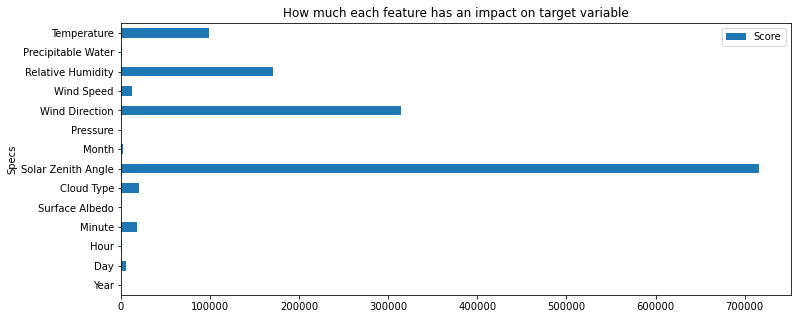

In [40]:
featuresScores.plot(x = 'Specs',kind = 'barh',figsize = (12,5),title = "How much each feature has an impact on target variable",ylabel="Score")

#### Exploring patterns & trends in the data

<AxesSubplot:xlabel='Solar Zenith Angle', ylabel='Temperature'>

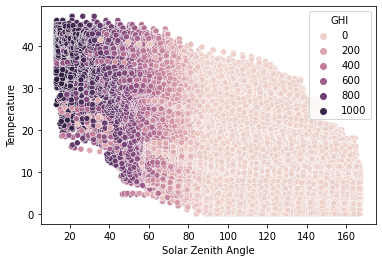

In [41]:
import seaborn as sns
sns.scatterplot(x = 'Solar Zenith Angle',y = 'Temperature',hue = 'GHI',data = df1)

<AxesSubplot:xlabel='Solar Zenith Angle', ylabel='Wind Direction'>

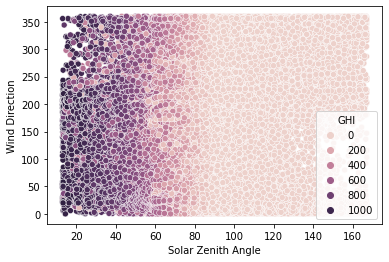

In [42]:
sns.scatterplot(x = 'Solar Zenith Angle',y = 'Wind Direction',hue = 'GHI',data = df1)

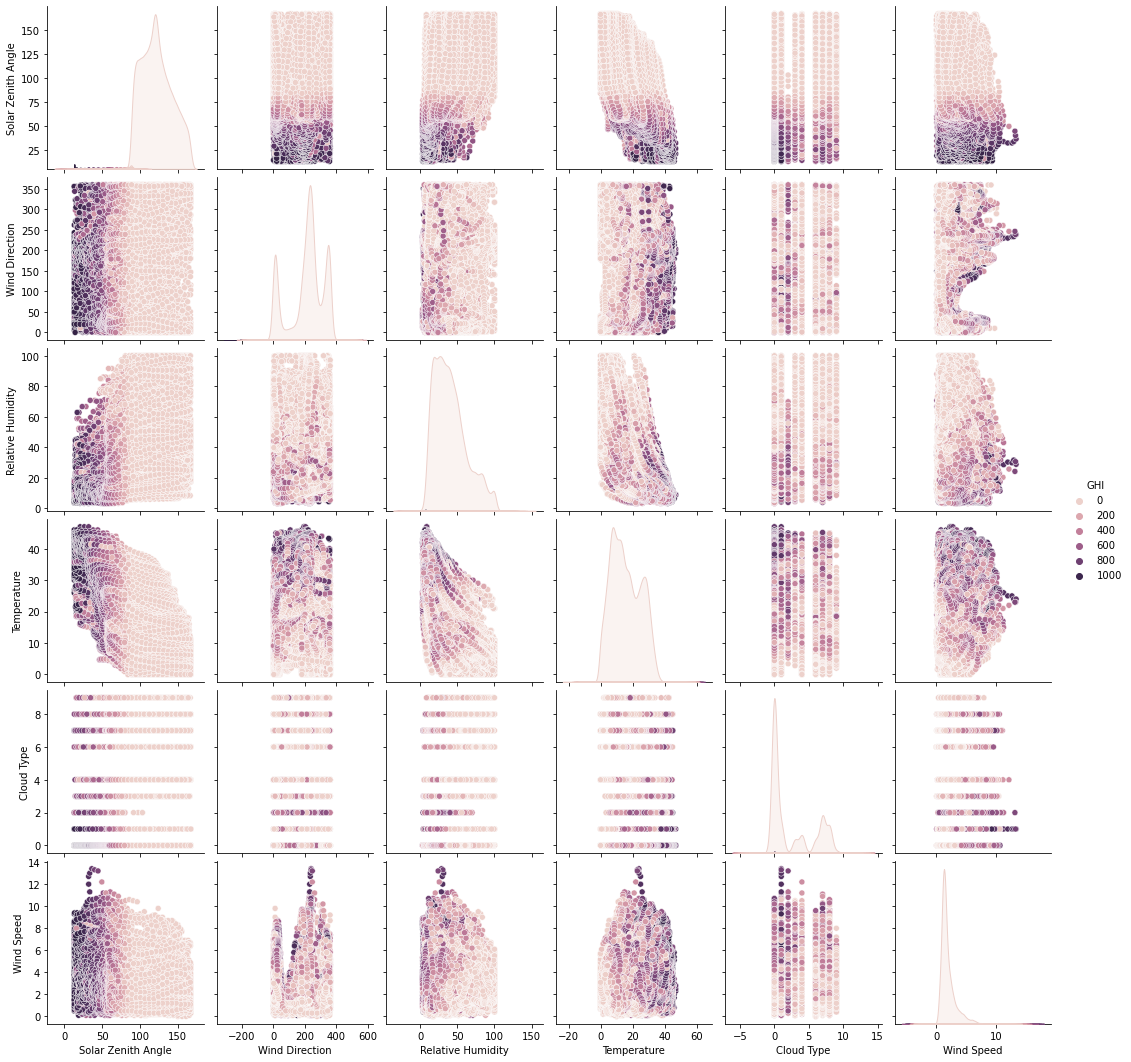

In [43]:
features = df1[['Solar Zenith Angle','Wind Direction','Relative Humidity','Temperature','Cloud Type','Wind Speed','GHI']]
sns.pairplot(features,hue = 'GHI')

Note:

From the above pairplot we can understand that the datapoints are very close to each other, like in the form of groups/clusters.
So here using Decision tree and K-nearest neighbors would be ideally better. Because Linear regression would definetely
perform bad in this case.

### Model Training and Testing

#### Model - 1 Decision Tree Regressor

In [44]:
x = df1[['Solar Zenith Angle','Wind Direction','Relative Humidity','Temperature','Cloud Type','Wind Speed']]
y = df1[['GHI']]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [46]:
from sklearn import tree

In [47]:
model1 = tree.DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
y_predict = model1.predict(x_test)

#### Score of the Model

In [49]:
print('Score of model on training data :{}'.format(model1.score(x_train,y_train)))

Score of model on training data :1.0


In [50]:
print('Score of model on testing data :{}'.format(model1.score(x_test,y_test)))

Score of model on testing data :0.9731597144771554


In [51]:
from sklearn.metrics import r2_score

In [52]:
print('r2_score :{}'.format(r2_score(y_test,y_predict)))

r2_score :0.9731597144771554


### Checking the accuracy of Model

#### Cross - checking first 10 values

In [53]:
y_predict[:10]

array([   0.,    0.,    0.,    0.,  818.,    0.,    0.,    0.,    0.,
       1052.])

In [54]:
y_test.iloc[:10]

,GHI
12001,0
29081,0
45022,0
5619,0
25661,823
51122,0
40090,0
13498,0
36375,0
25320,1049


#### Cross- checking last 10 values

In [55]:
y_predict[:-10:-1]

array([  0.,   0.,   0., 121., 514.,   0., 626.,  32., 554.])

In [56]:
y_test.iloc[:-10:-1]

,GHI
33892,0
44439,0
46758,0
28860,124
13649,494
6864,0
2803,613
22596,21
26463,533


#### Model 2 - K Nearest Neighbors

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

In [58]:
rmse = [] #root mean squared error
score = [] #Score of the model
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_predict))
    model_score = knn.score(x_test,y_test)
    score.append(model_score)
    rmse.append(error)

In [59]:
myx = [i for i in range(1,10)]

#### Checking the Root mean squared error

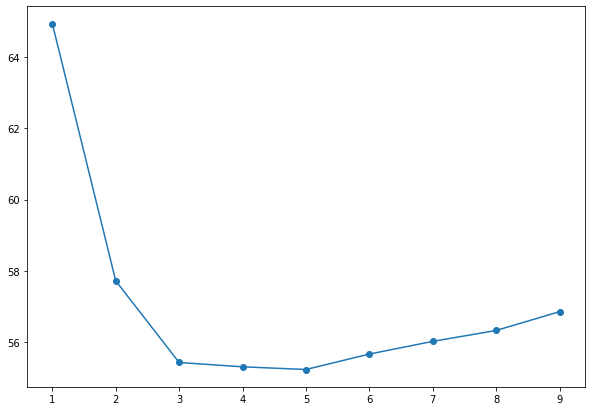

In [60]:
plt.figure(figsize = (10,7))
plt.plot(myx,rmse,marker = "o")

#### Checking the Model score

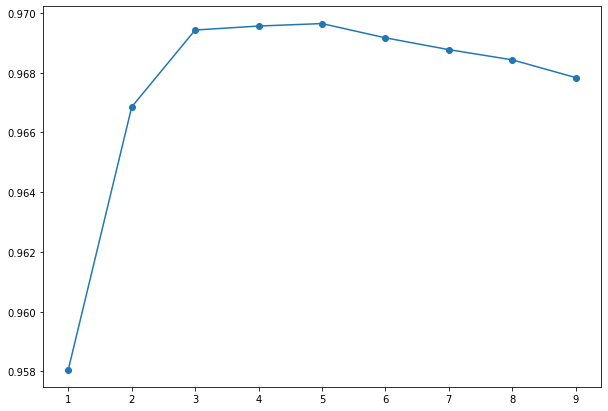

In [61]:
plt.figure(figsize = (10,7))
plt.plot(myx,score,marker = "o")

Note:
    We can see that for the value of K = 5, the score of model is highest and root mean squared error is minimum

In [77]:
model2 = KNeighborsRegressor(n_neighbors= 5)
model2.fit(x_train,y_train)

KNeighborsRegressor()

In [78]:
y_predict = model2.predict(x_test)

#### Score of the model

In [79]:
print('Score of model on training data :{}'.format(model2.score(x_train,y_train)))

Score of model on training data :0.9792781436121751


In [80]:
print('Score of model on testing data :{}'.format(model2.score(x_test,y_test)))

Score of model on testing data :0.9696456070796735


In [81]:
print('r2_score :{}'.format(r2_score(y_test,y_predict)))

r2_score :0.9696456070796735


#### Model 3 Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
model3 = LinearRegression()

In [84]:
model3.fit(x_train,y_train)

LinearRegression()

In [85]:
y_predict = model3.predict(x_test)

#### Score of Model

In [86]:
print('Score of model on training data :{}'.format(model3.score(x_train,y_train)))

Score of model on training data :0.7610694885343321


In [87]:
print('Score of model on testing data :{}'.format(model3.score(x_test,y_test)))

Score of model on testing data :0.7609465601595969


In [88]:
print('r2_score :{}'.format(r2_score(y_test,y_predict)))

r2_score :0.7609465601595969


#### Saving Model

In [90]:
import pickle

In [91]:
# pkl_filename = "DecisionReg_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model1, file)

In [92]:
# df1.to_csv('weather_data.csv')

In [94]:
# pkl_filename = "KNN_Reg_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model2, file)

In [95]:
# pkl_filename = "Linear_Reg_model.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model3, file)